# Q1

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.transform import *

In [46]:
digits = datasets.load_digits()

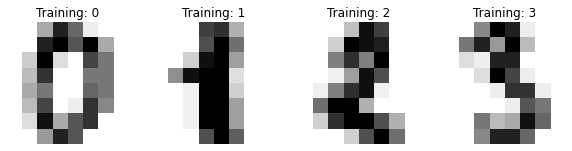

In [47]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [48]:
n_samples = len(digits.images)
img = digits.images.reshape((n_samples, -1))
img.shape

(1797, 64)

In [52]:
def model(data):
    xtrain, x_test, ytrain, y_test = train_test_split(
        data, digits.target, test_size=0.15, stratify=digits.target
    )

    x_train, x_dev, y_train, y_dev = train_test_split(
        xtrain, ytrain, test_size=0.2, stratify=ytrain
    )

    gamma = [1e-3, 1e-5, 1e-6]
    C = [4,12]
    list = [gamma,C]
    combinations = [p for p in itertools.product(*list)]
    params,train_acc,dev_acc,test_acc=[],[],[],[]
    for gamma,c in combinations:
        params.append((gamma,c))
        svmc = svm.SVC( kernel='rbf',gamma=gamma,C=c)
        svmc.fit(x_train, y_train)
        train_acc.append(accuracy_score(y_train,svmc.predict(x_train)))
        dev_acc.append(accuracy_score(y_dev,svmc.predict(x_dev)))
        test_acc.append(accuracy_score(y_test,svmc.predict(x_test)))

    results = pd.DataFrame({'hyper_params':params,'train_accuracy':train_acc,'dev_accuracy':dev_acc,'test_accuracy':test_acc})

    return results, (results[results['dev_accuracy']==max(results['dev_accuracy'])])
 

In [53]:
result, best = model(img)

In [54]:
result

,hyper_params,train_accuracy,dev_accuracy,test_accuracy
0,"(0.001, 4)",1.000000,0.993464,0.992593
1,"(0.001, 12)",1.000000,0.993464,0.992593
2,"(1e-05, 4)",0.954955,0.973856,0.966667
3,"(1e-05, 12)",0.973792,0.983660,0.981481
4,"(1e-06, 4)",0.665848,0.660131,0.633333
5,"(1e-06, 12)",0.912367,0.934641,0.911111


In [55]:
best

,hyper_params,train_accuracy,dev_accuracy,test_accuracy
0,"(0.001, 4)",1.0,0.993464,0.992593
1,"(0.001, 12)",1.0,0.993464,0.992593


# Q2

In [56]:
digits.images.shape

(1797, 8, 8)

In [57]:
R1 = np.array([resize(digits.images[i].reshape(8,8),(5,5)) for i in range(len(digits.images))])
R2 = np.array([resize(digits.images[i].reshape(8,8),(20,20)) for i in range(len(digits.images))])
R3 = np.array([resize(digits.images[i].reshape(8,8),(32,32)) for i in range(len(digits.images))])

In [58]:
print(R1.shape)
print(R2.shape)
print(R3.shape)

(1797, 5, 5)
(1797, 20, 20)
(1797, 32, 32)


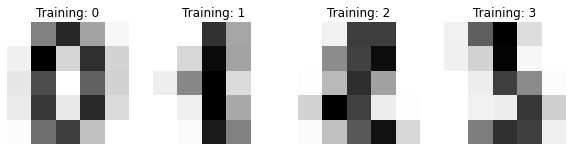

In [59]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, R1, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

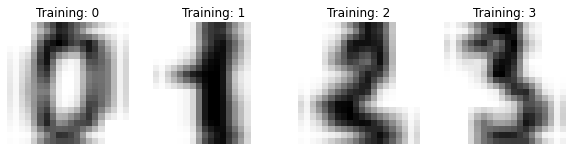

In [60]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, R2, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

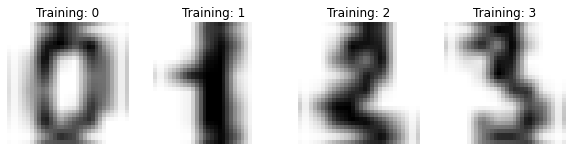

In [61]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, R3, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# R1

In [63]:
result, best = model(R1.reshape((n_samples, -1)))

In [64]:
result

,hyper_params,train_accuracy,dev_accuracy,test_accuracy
0,"(0.001, 4)",0.992629,0.983660,0.981481
1,"(0.001, 12)",0.997543,0.977124,0.981481
2,"(1e-05, 4)",0.893530,0.872549,0.844444
3,"(1e-05, 12)",0.926290,0.921569,0.874074
4,"(1e-06, 4)",0.287469,0.277778,0.277778
5,"(1e-06, 12)",0.647011,0.601307,0.600000


In [65]:
best

,hyper_params,train_accuracy,dev_accuracy,test_accuracy
0,"(0.001, 4)",0.992629,0.98366,0.981481


# R2

In [66]:
result, best = model(R2.reshape((n_samples, -1)))

In [67]:
result

,hyper_params,train_accuracy,dev_accuracy,test_accuracy
0,"(0.001, 4)",1.000000,0.986928,0.974074
1,"(0.001, 12)",1.000000,0.986928,0.974074
2,"(1e-05, 4)",0.980344,0.970588,0.977778
3,"(1e-05, 12)",0.989353,0.980392,0.977778
4,"(1e-06, 4)",0.927109,0.905229,0.922222
5,"(1e-06, 12)",0.954955,0.950980,0.944444


In [68]:
best

,hyper_params,train_accuracy,dev_accuracy,test_accuracy
0,"(0.001, 4)",1.0,0.986928,0.974074
1,"(0.001, 12)",1.0,0.986928,0.974074


# R3

In [70]:
result, best = model(R3.reshape((n_samples, -1)))

In [71]:
result

,hyper_params,train_accuracy,dev_accuracy,test_accuracy
0,"(0.001, 4)",1.000000,0.892157,0.896296
1,"(0.001, 12)",1.000000,0.892157,0.896296
2,"(1e-05, 4)",0.995086,0.990196,0.970370
3,"(1e-05, 12)",0.996724,0.990196,0.981481
4,"(1e-06, 4)",0.951679,0.957516,0.937037
5,"(1e-06, 12)",0.974611,0.977124,0.959259


In [72]:
best

,hyper_params,train_accuracy,dev_accuracy,test_accuracy
2,"(1e-05, 4)",0.995086,0.990196,0.970370
3,"(1e-05, 12)",0.996724,0.990196,0.981481
